<a href="https://colab.research.google.com/github/fsternini/nlp-newspaper/blob/development/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# First, verification of Python version is completed
!which python # should return /usr/local/bin/python
!python --version

/usr/local/bin/python
Python 3.10.12


In [51]:
!git clone 'https://github.com/fsternini/nlp-newspaper.git'
%cd 'nlp-newspaper'
# Switch to the most updated branch
!git switch development
# Collect the most updated version of the repo
!git pull

Cloning into 'nlp-newspaper'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 41 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 1.26 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/nlp-newspaper/nlp-newspaper
Branch 'development' set up to track remote branch 'development' from 'origin'.
Switched to a new branch 'development'
Already up to date.


In [52]:
# Install all requirements for the code
!pip install -r requirements.txt -q
!python -m unidic download
# Google Drive is mounted, to reach all relevant data
from google.colab import drive
import os
import pandas as pd
import colab_env
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
dataset_path = os.environ['NLP_DATASET']

download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:24<00:00, 21.4MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.10/dist-packages/unidic/dicdir
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
eng_file_path = dataset_path+'/english_news.csv'
jpn_file_path = dataset_path+'/japanese_news.csv'
english_news = pd.read_csv(eng_file_path, sep='\t')
japanese_news = pd.read_csv(jpn_file_path, sep='\t')

<ipython-input-53-c97bfcc42ecb>:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  japanese_news = pd.read_csv(jpn_file_path, sep='\t')


In [54]:
english_news.head()

,source,date,title,author,text
0,Mainichi Shimbun,2021-12-06,"Editorial: Japan govt's 20,000-yen handout mis...",NaN,The Japanese government is trying to boost the...
1,Mainichi Shimbun,2021-12-07,Editorial: Time for Japan PM Kishida to delive...,NaN,"Prime Minister Fumio Kishida, who won a public..."
2,Mainichi Shimbun,2021-12-08,"Editorial: 80 years on from Pearl Harbor, acti...",NaN,It has been 80 years since the start of the Pa...
3,Mainichi Shimbun,2021-12-08,"Yoroku: 80 years later, many lessons still not...",NaN,"""The world has changed completely. The era was..."
4,Mainichi Shimbun,2021-12-08,Promoting respect for human rights behind US '...,NaN,The U.S. administration under President Joe Bi...


In [55]:
japanese_news.head()

,source,date,title,author,text
0,kobe-np.co.jp,2005-07-01,NaN,NaN,会見した北口寛人市長は「刑事訴訟で被告となっている職員にはそれぞれ主張があるが、組織全体とし...
1,kobe-np.co.jp,2005-07-01,NaN,NaN,明石・歩道橋事故をめぐる民事訴訟で、神戸地裁から計五億六千八百万円の賠償を命じられた兵庫県（...
2,kobe-np.co.jp,2007-04-07,NaN,NaN,会見後、遺族代理人の渡部吉泰弁護士は「裁判長が『問うべき者を問わないのは正義に反する』とはっ...
3,kobe-np.co.jp,2007-04-07,NaN,NaN,遺族会は、雑踏警備本部長を務めた元明石署長ら二人の起訴を求め、活動を続けている。
4,kobe-np.co.jp,2007-04-07,NaN,NaN,五人の遺族が閉廷後に会見。二女の優衣菜ちゃん＝当時（８つ）＝を亡くした三木清さん（３８）＝姫...


##English database Exploratory Data Analysis

In [56]:
english_news.count()

source    36889
date      36889
title     36889
author    12846
text      36766
dtype: int64

In [57]:
english_news.isna().sum()

source        0
date          0
title         0
author    24043
text        123
dtype: int64

In [58]:
english_news = english_news.drop('author',axis=1)

In [59]:
english_news = english_news.dropna()

The Japan Times     36692
Mainichi Shimbun       74
Name: source, dtype: int64

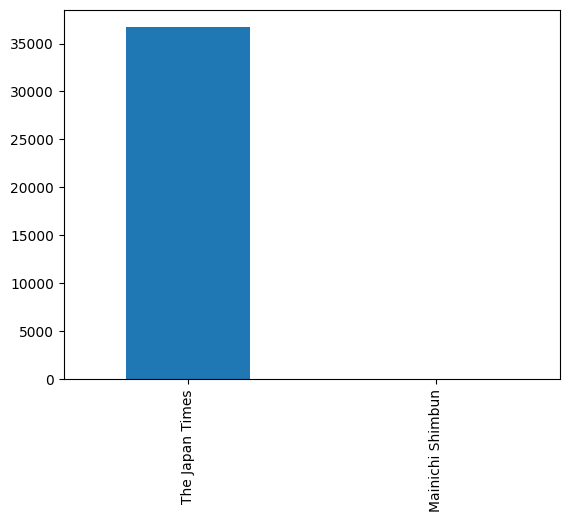

In [60]:
en_source_count = english_news["source"].value_counts()
en_source_count.plot(kind='bar')
en_source_count

## Japanese database exploratory analysis

In [61]:
japanese_news.count()

source    312955
date      312955
title         39
author         1
text      312954
dtype: int64

In [62]:
japanese_news.isna().sum()

source         0
date           0
title     312916
author    312954
text           1
dtype: int64

In [63]:
japanese_news = japanese_news.drop(['author','title'],axis=1)

In [64]:
japanese_news = japanese_news.dropna()

In [65]:
japanese_news.iloc[0]["text"]

'会見した北口寛人市長は「刑事訴訟で被告となっている職員にはそれぞれ主張があるが、組織全体として判決を厳しく受け止めた」と述べた。原告団長の下村誠治さん（４６）＝神戸市垂水区＝も同席。「県警も判決を真摯（しんし）に受け止めて」と訴えた。'

mainichi.jp          44656
sankei.jp.msn.com    35959
nikkei.com           29323
sanspo.com           26303
tomamin.co.jp        26054
nikkansports.com     25483
oita-press.co.jp     23645
yomiuri.co.jp        22472
nishinippon.co.jp    21311
asahi.com            19855
hokkaido-np.co.jp    10653
shimotsuke.co.jp      9581
kobe-np.co.jp         8311
kyoto-np.co.jp        3408
yamagata-np.jp        2585
isenp.co.jp           1496
iwate-np.co.jp        1198
nnn.co.jp              347
tokachi.co.jp          176
chunichi.co.jp          73
tokyo-np.co.jp          65
Name: source, dtype: int64

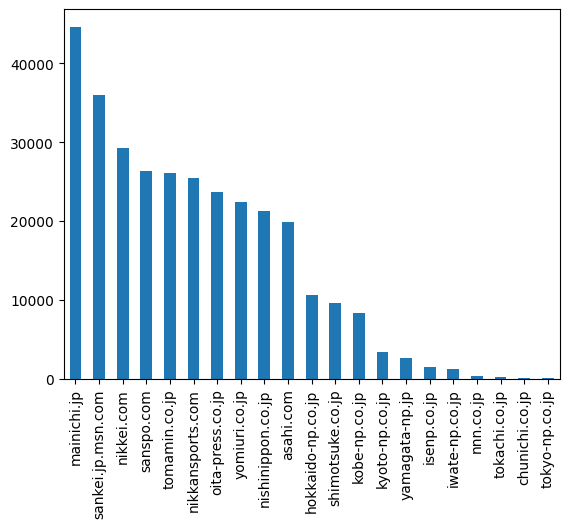

In [66]:
jp_source_count = japanese_news["source"].value_counts()
jp_source_count.plot(kind='bar')
jp_source_count

In [67]:
japanese_news["length"] = japanese_news["text"].str.len()

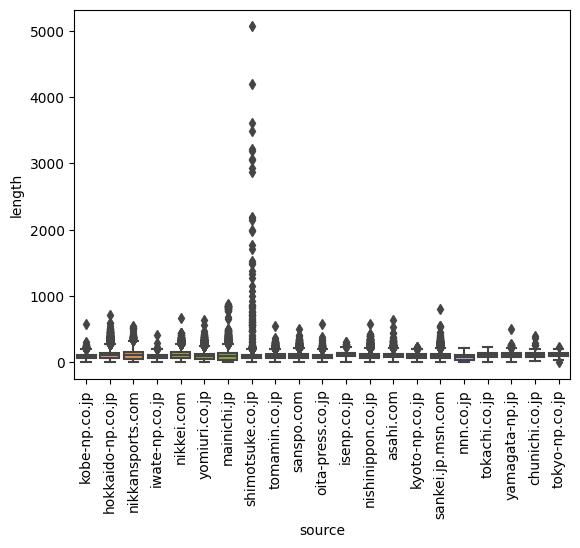

In [68]:
ax = sns.boxplot(data = japanese_news, x='source', y='length')
ax.tick_params(axis='x', labelrotation=90)

<Axes: xlabel='length', ylabel='Density'>

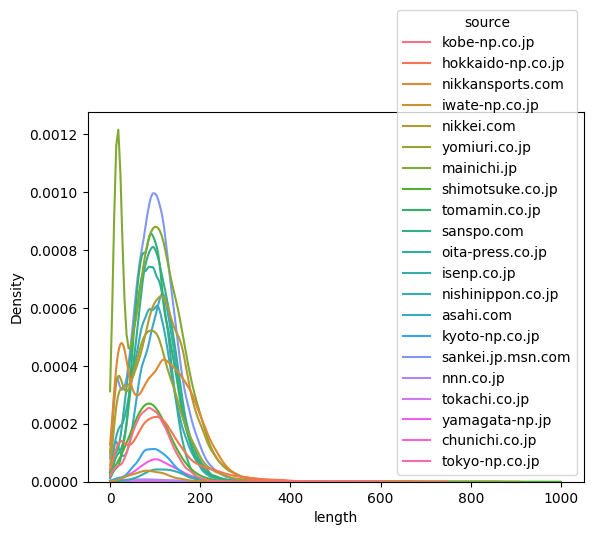

In [69]:
sns.kdeplot(data = japanese_news, x='length',hue=japanese_news['source'], clip=[0,1000])

In [70]:
from fugashi import Tagger

tagger = Tagger('-Owakati')
japanese_news["tokens"] = japanese_news["text"].apply(tagger.parse)
japanese_news.head()

,source,date,text,length,tokens
0,kobe-np.co.jp,2005-07-01,会見した北口寛人市長は「刑事訴訟で被告となっている職員にはそれぞれ主張があるが、組織全体とし...,117,会見 し た 北口 寛人 市長 は 「 刑事 訴訟 で 被告 と なっ て いる 職員 に ...
1,kobe-np.co.jp,2005-07-01,明石・歩道橋事故をめぐる民事訴訟で、神戸地裁から計五億六千八百万円の賠償を命じられた兵庫県（...,105,明石 ・ 歩道 橋 事故 を めぐる 民事 訴訟 で 、 神戸 地裁 から 計 五 億 六千...
2,kobe-np.co.jp,2007-04-07,会見後、遺族代理人の渡部吉泰弁護士は「裁判長が『問うべき者を問わないのは正義に反する』とはっ...,84,会見 後 、 遺族 代理 人 の 渡部 吉 泰 弁護 士 は 「 裁判 長 が 『 問う べ...
3,kobe-np.co.jp,2007-04-07,遺族会は、雑踏警備本部長を務めた元明石署長ら二人の起訴を求め、活動を続けている。,40,遺族 会 は 、 雑踏 警備 本部 長 を 務め た 元 明石 署 長 ら 二人 の 起訴 ...
4,kobe-np.co.jp,2007-04-07,五人の遺族が閉廷後に会見。二女の優衣菜ちゃん＝当時（８つ）＝を亡くした三木清さん（３８）＝姫...,96,五 人 の 遺族 が 閉廷 後 に 会見 。 二女 の 優衣 菜 ちゃん ＝ 当時 （ ８ ...


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


X = japanese_news["tokens"]
y = japanese_news["source"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)


In [72]:
X_train.shape

(250363, 123407)

In [73]:
X_test = vectorizer.transform(X_test)

In [74]:
X_test.shape

(62591, 123407)

In [75]:
classifier = SGDClassifier(loss='hinge', penalty='l2',
...                           alpha=1e-3, random_state=42,
...                           max_iter=5, tol=None)

# Step 6: Train the classifier
classifier.fit(X_train, y_train)

# Step 7: Evaluate the performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49066159671518267


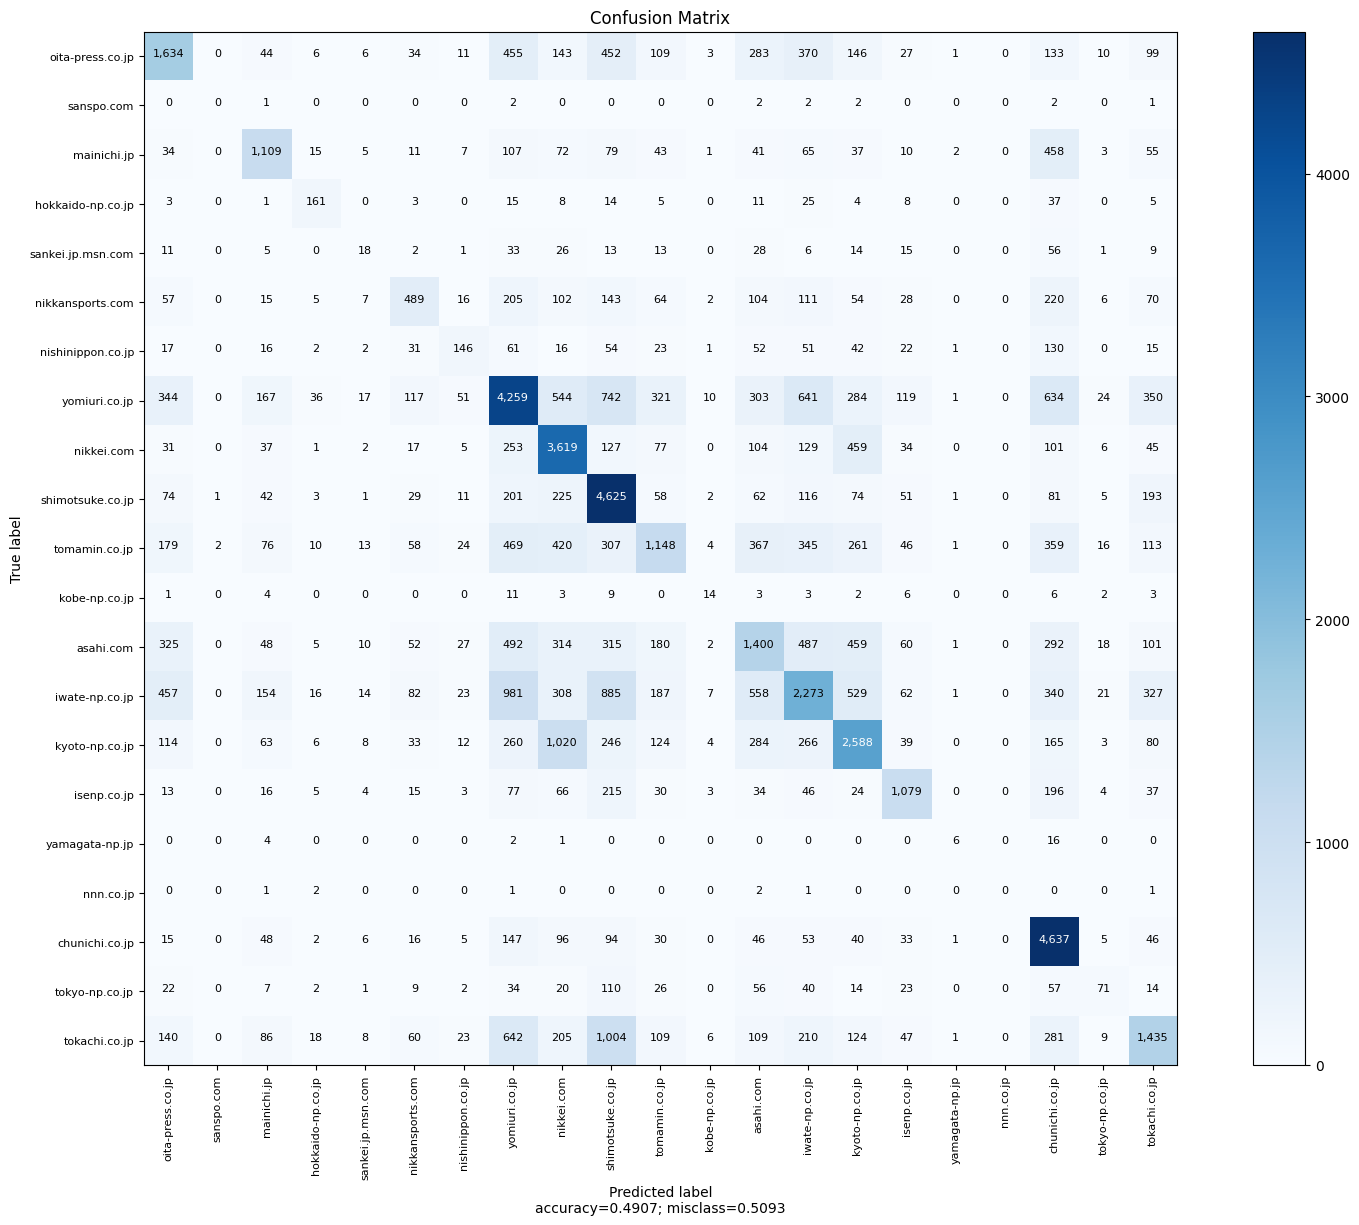

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix_2(cm,
                      target_names,
                      title='Confusion matrix',
                      cmap=None,
                      normalize=True):
  """
  given a sklearn confusion matrix (cm), make a nice plot

  Arguments
  ---------
  cm:           confusion matrix from sklearn.metrics.confusion_matrix

  target_names: given classification classes such as [0, 1, 2]
                the class names, for example: ['high', 'medium', 'low']

  title:        the text to display at the top of the matrix

  cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                see http://matplotlib.org/examples/color/colormaps_reference.html
                plt.get_cmap('jet') or plt.cm.Blues

  normalize:    If False, plot the raw numbers
                If True, plot the proportions


  Citiation
  ---------
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

  """
  FONT_SIZE = 8

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8*2, 6*2))    # 8, 6
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
      plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

plot_confusion_matrix_2(confusion_matrix(y_test,y_pred), y_test.unique(), normalize=False, title='Confusion Matrix')

#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
#plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=y_test.unique()))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

 oita-press.co.jp       0.47      0.41      0.44      3966
       sanspo.com       0.00      0.00      0.00        12
      mainichi.jp       0.57      0.51      0.54      2154
hokkaido-np.co.jp       0.55      0.54      0.54       300
sankei.jp.msn.com       0.15      0.07      0.10       251
 nikkansports.com       0.46      0.29      0.35      1698
nishinippon.co.jp       0.40      0.21      0.28       682
    yomiuri.co.jp       0.49      0.48      0.48      8964
       nikkei.com       0.50      0.72      0.59      5047
 shimotsuke.co.jp       0.49      0.79      0.61      5855
    tomamin.co.jp       0.45      0.27      0.34      4218
    kobe-np.co.jp       0.24      0.21      0.22        67
        asahi.com       0.36      0.31      0.33      4588
   iwate-np.co.jp       0.43      0.31      0.36      7225
   kyoto-np.co.jp       0.50      0.49      0.49      5315
      isenp.co.jp       0.63      0.58      0.60      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
freq = japanese_news["source"].value_counts()<2000
low_freq=freq.loc[freq==True]
low_freq.index.to_list()

['isenp.co.jp',
 'iwate-np.co.jp',
 'nnn.co.jp',
 'tokachi.co.jp',
 'chunichi.co.jp',
 'tokyo-np.co.jp']

In [79]:
jp_news_filt = japanese_news[~japanese_news["source"].isin(low_freq.index.to_list())]

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


X = jp_news_filt["tokens"]
y = jp_news_filt["source"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)


In [81]:
X_train.shape

(247679, 122724)

In [82]:
X_test = vectorizer.transform(X_test)

In [83]:
X_test.shape

(61920, 122724)

In [84]:
classifier = SGDClassifier(loss='hinge', penalty='l2',
...                           alpha=1e-3, random_state=42,
...                           max_iter=5, tol=None)

# Step 6: Train the classifier
classifier.fit(X_train, y_train)

# Step 7: Evaluate the performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49531653746770027


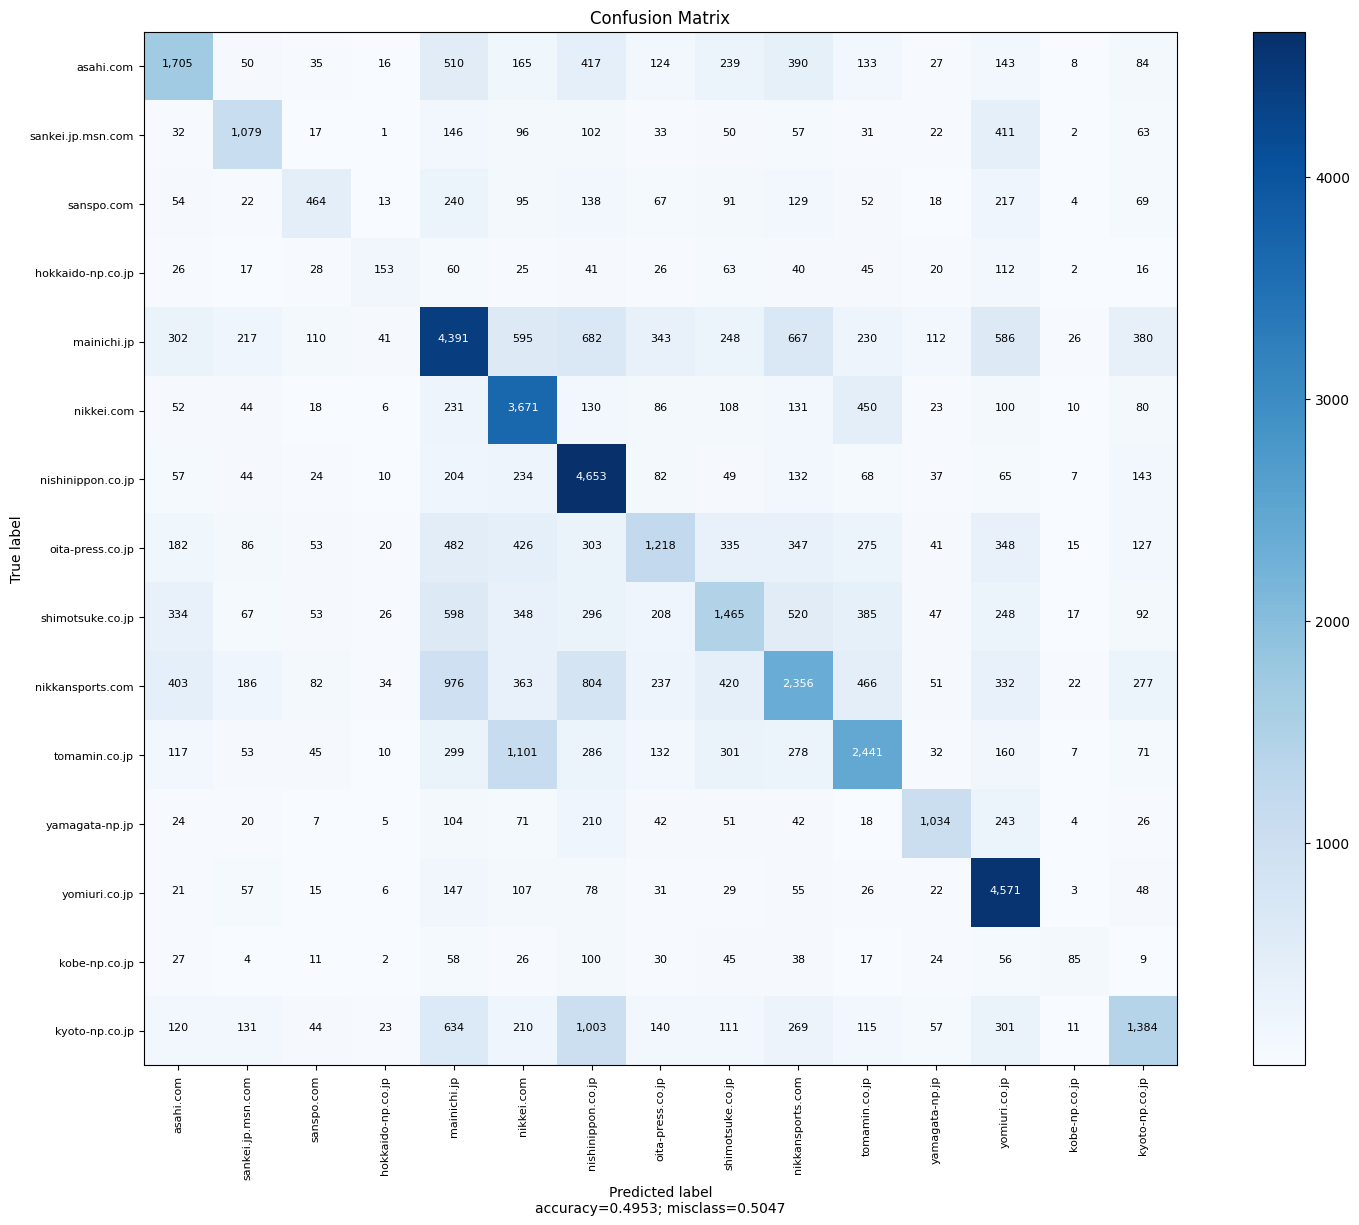

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix_2(cm,
                      target_names,
                      title='Confusion matrix',
                      cmap=None,
                      normalize=True):
  """
  given a sklearn confusion matrix (cm), make a nice plot

  Arguments
  ---------
  cm:           confusion matrix from sklearn.metrics.confusion_matrix

  target_names: given classification classes such as [0, 1, 2]
                the class names, for example: ['high', 'medium', 'low']

  title:        the text to display at the top of the matrix

  cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                see http://matplotlib.org/examples/color/colormaps_reference.html
                plt.get_cmap('jet') or plt.cm.Blues

  normalize:    If False, plot the raw numbers
                If True, plot the proportions


  Citiation
  ---------
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

  """
  FONT_SIZE = 8

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8*2, 6*2))    # 8, 6
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
      plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

plot_confusion_matrix_2(confusion_matrix(y_test,y_pred), y_test.unique(), normalize=False, title='Confusion Matrix')

#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
#plt.show()

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=y_test.unique()))

                   precision    recall  f1-score   support

        asahi.com       0.49      0.42      0.45      4046
sankei.jp.msn.com       0.52      0.50      0.51      2142
       sanspo.com       0.46      0.28      0.35      1673
hokkaido-np.co.jp       0.42      0.23      0.29       674
      mainichi.jp       0.48      0.49      0.49      8930
       nikkei.com       0.49      0.71      0.58      5140
nishinippon.co.jp       0.50      0.80      0.62      5809
 oita-press.co.jp       0.44      0.29      0.35      4258
 shimotsuke.co.jp       0.41      0.31      0.35      4704
 nikkansports.com       0.43      0.34      0.38      7009
    tomamin.co.jp       0.51      0.46      0.48      5333
   yamagata-np.jp       0.66      0.54      0.60      1901
    yomiuri.co.jp       0.58      0.88      0.70      5216
    kobe-np.co.jp       0.38      0.16      0.23       532
   kyoto-np.co.jp       0.48      0.30      0.37      4553

         accuracy                           0.50     6

In [87]:
import urllib
from urllib.request import urlopen
import re

# slothlib
slothlib_path = "http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt"
sloth_file = urllib.request.urlopen(slothlib_path)

# stopwordsiso
iso_path = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ja/master/stopwords-ja.txt"
iso_file = urllib.request.urlopen(iso_path)
stopwords = [line.decode("utf-8").strip() for line in iso_file]

stopwords = [ss for ss in stopwords if not ss==u'']
stopwords = list(set(stopwords))


In [88]:

X = jp_news_filt["tokens"]
y = jp_news_filt["source"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
vectorizer = TfidfVectorizer(stop_words=stopwords)
X_train = vectorizer.fit_transform(X_train)

In [89]:
X_train.shape

(247679, 122652)

In [90]:
X_test = vectorizer.transform(X_test)

In [91]:
X_test.shape

(61920, 122652)

In [92]:
classifier = SGDClassifier(loss='hinge', penalty='l2',
...                           alpha=1e-3, random_state=42,
...                           max_iter=5, tol=None)

# Step 6: Train the classifier
classifier.fit(X_train, y_train)

# Step 7: Evaluate the performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49249031007751937


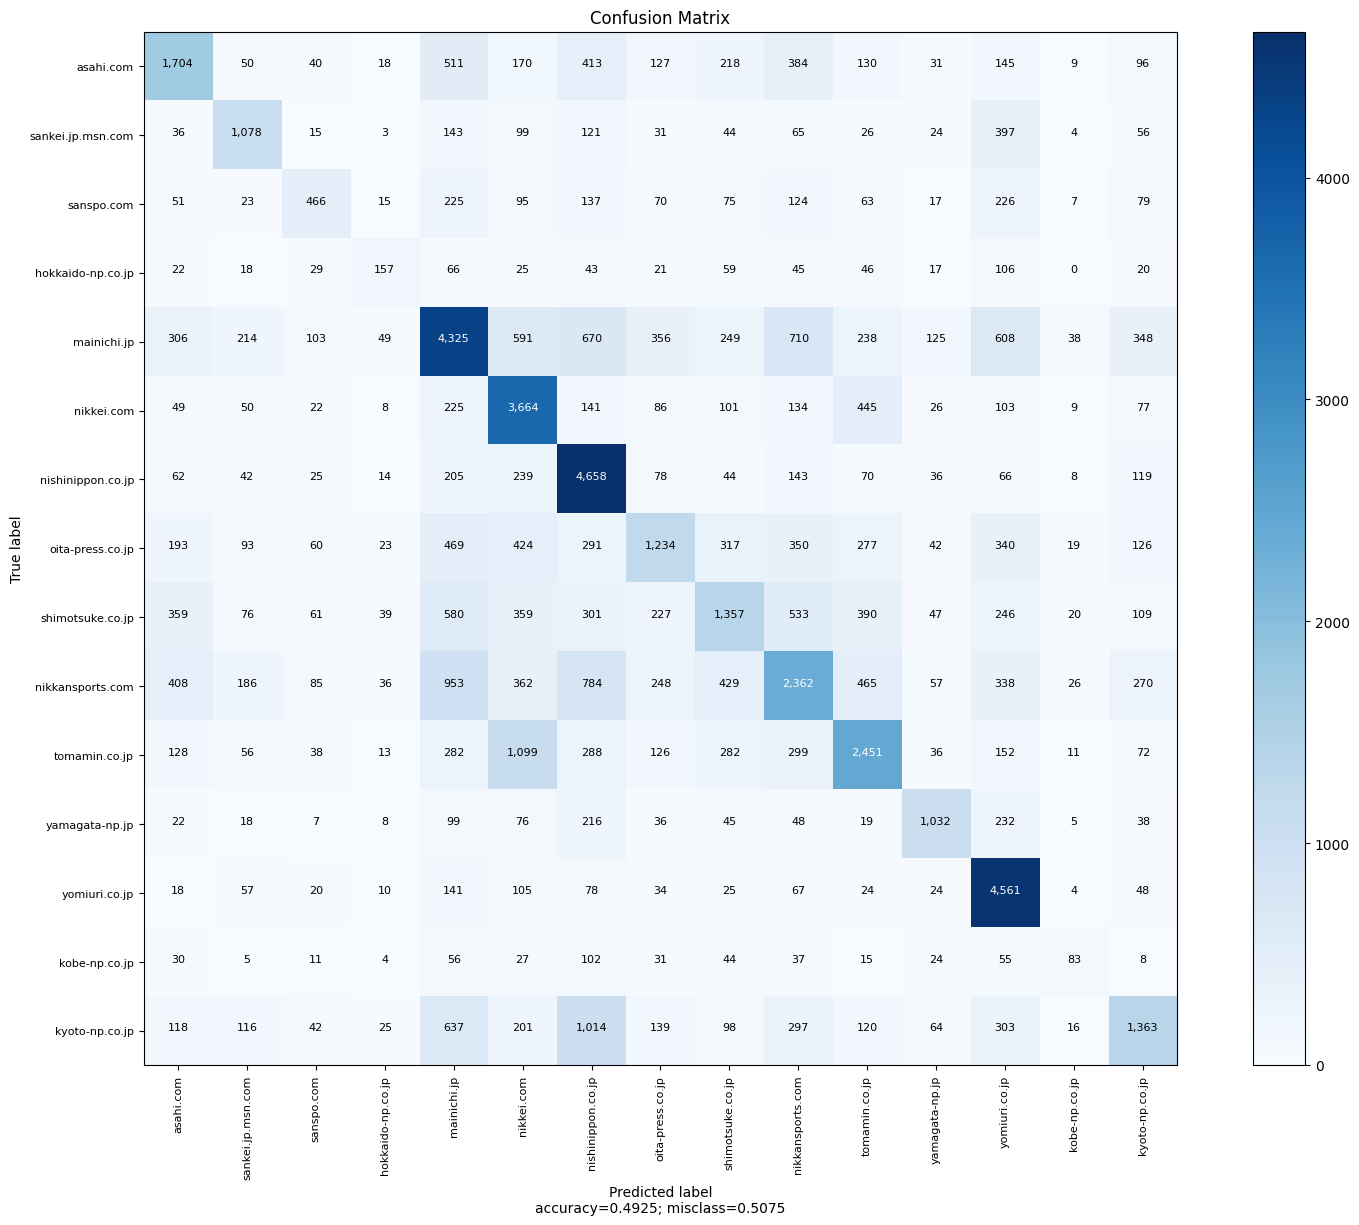

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix_2(cm,
                      target_names,
                      title='Confusion matrix',
                      cmap=None,
                      normalize=True):
  """
  given a sklearn confusion matrix (cm), make a nice plot

  Arguments
  ---------
  cm:           confusion matrix from sklearn.metrics.confusion_matrix

  target_names: given classification classes such as [0, 1, 2]
                the class names, for example: ['high', 'medium', 'low']

  title:        the text to display at the top of the matrix

  cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                see http://matplotlib.org/examples/color/colormaps_reference.html
                plt.get_cmap('jet') or plt.cm.Blues

  normalize:    If False, plot the raw numbers
                If True, plot the proportions


  Citiation
  ---------
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

  """
  FONT_SIZE = 8

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8*2, 6*2))    # 8, 6
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
      plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

plot_confusion_matrix_2(confusion_matrix(y_test,y_pred), y_test.unique(), normalize=False, title='Confusion Matrix')

#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
#plt.show()

In [94]:
from transformers import pipeline
from datasets import Dataset
import torch
import accelerate

In [113]:
pipe = pipeline("feature-extraction",model='cl-tohoku/bert-base-japanese-v3')

In [143]:
dataset = Dataset.from_pandas(jp_news_filt.filter(["text","source"]))

KeyboardInterrupt: ignored

In [130]:
dataset[0]

{'text': '会見した北口寛人市長は「刑事訴訟で被告となっている職員にはそれぞれ主張があるが、組織全体として判決を厳しく受け止めた」と述べた。原告団長の下村誠治さん（４６）＝神戸市垂水区＝も同席。「県警も判決を真摯（しんし）に受け止めて」と訴えた。',
 'source': 'kobe-np.co.jp',
 '__index_level_0__': 0}

In [117]:
!pip install tdqm
from tqdm.auto import tqdm


In [ ]:
for document in tqdm(dataset):
  document["emb"]=pipe(document["text"])


In [145]:
dataset = dataset.map(lambda examples: pipe(examples["text"]), batched=True)

Using bos_token, but it is not set yet.
Using eos_token, but it is not set yet.


KeyboardInterrupt: ignored

In [ ]:

X = jp_news_filt["bert"]
y = jp_news_filt["source"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
#vectorizer = TfidfVectorizer(stop_words=stopwords)
#X_train = vectorizer.fit_transform(X_train)

In [ ]:
X_train.shape

In [ ]:
#X_test = vectorizer.transform(X_test)

In [ ]:
X_test.shape

(61920, 122652)

In [ ]:
classifier = SGDClassifier(loss='hinge', penalty='l2',
...                           alpha=1e-3, random_state=42,
...                           max_iter=5, tol=None)

# Step 6: Train the classifier
classifier.fit(X_train, y_train)

# Step 7: Evaluate the performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49249031007751937


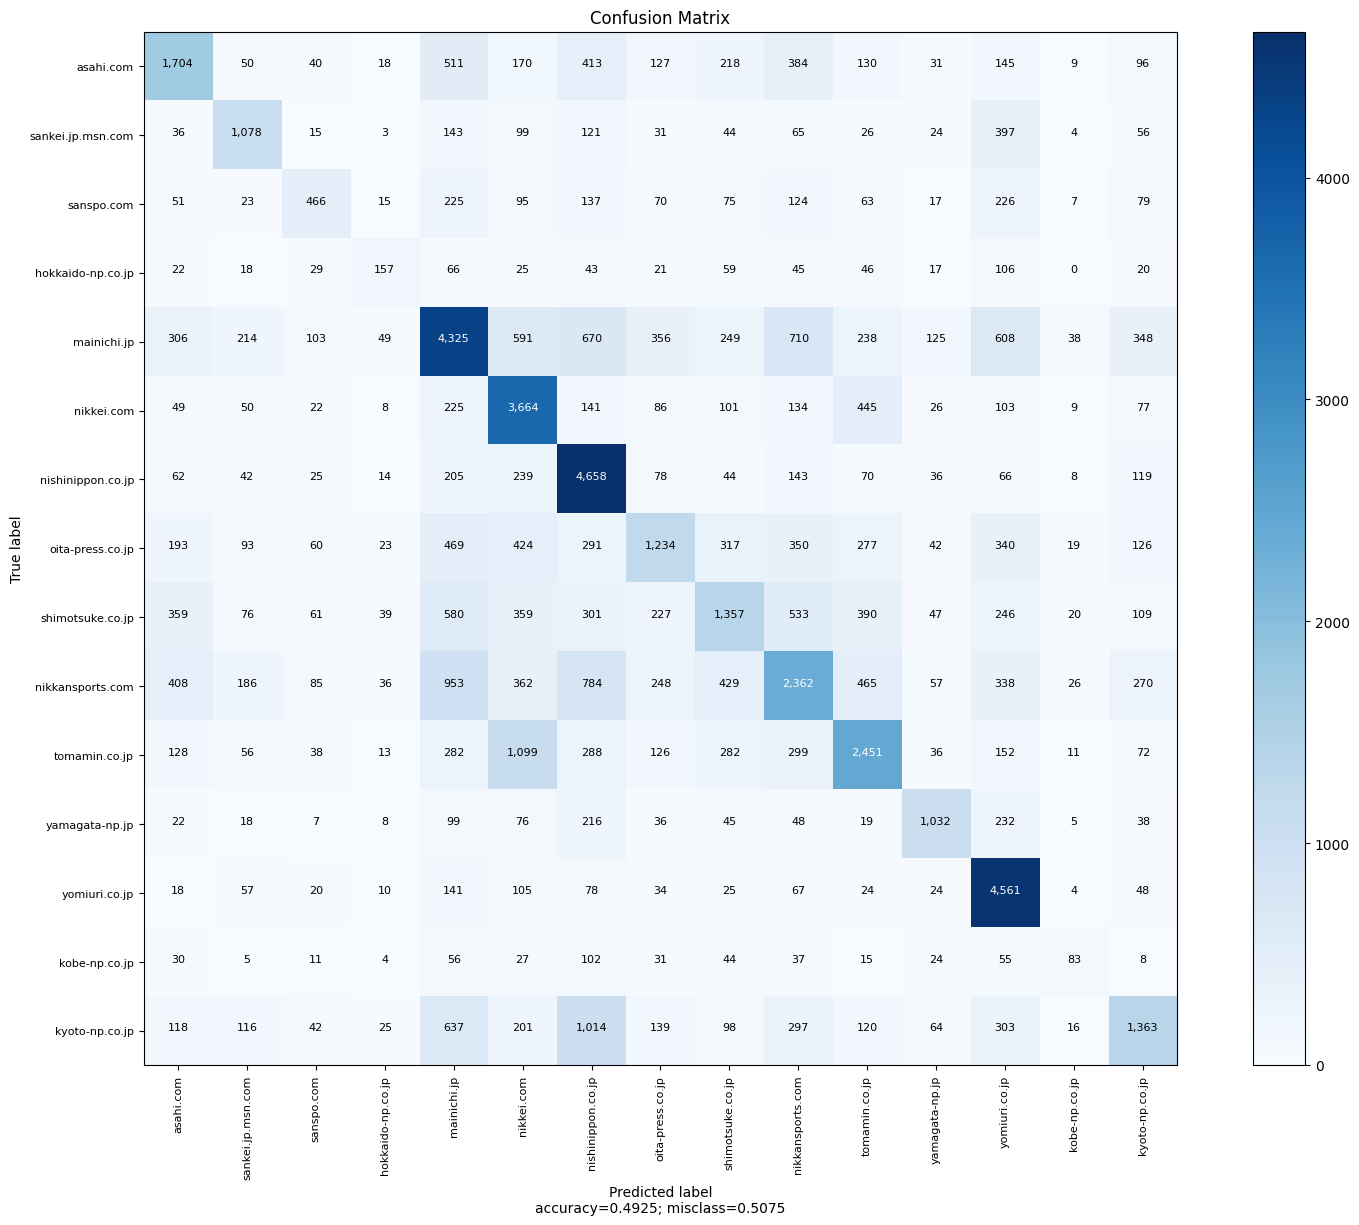

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix_2(cm,
                      target_names,
                      title='Confusion matrix',
                      cmap=None,
                      normalize=True):
  """
  given a sklearn confusion matrix (cm), make a nice plot

  Arguments
  ---------
  cm:           confusion matrix from sklearn.metrics.confusion_matrix

  target_names: given classification classes such as [0, 1, 2]
                the class names, for example: ['high', 'medium', 'low']

  title:        the text to display at the top of the matrix

  cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                see http://matplotlib.org/examples/color/colormaps_reference.html
                plt.get_cmap('jet') or plt.cm.Blues

  normalize:    If False, plot the raw numbers
                If True, plot the proportions


  Citiation
  ---------
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

  """
  FONT_SIZE = 8

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8*2, 6*2))    # 8, 6
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
      plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                  horizontalalignment="center",
                  fontsize=FONT_SIZE,
                  color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

plot_confusion_matrix_2(confusion_matrix(y_test,y_pred), y_test.unique(), normalize=False, title='Confusion Matrix')

#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
#plt.show()